<a href="https://colab.research.google.com/github/jiu45/Maeru/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Classification Project

## 1. Introduction & Data Loading

The goal of this project is to explore supervised machine learning by building and evaluating Decision Trees and Neural Networks on the MNIST dataset. The MNIST dataset consists of 70,000 grayscale images of handwritten digits (0-9), each 28x28 pixels.

In this notebook, we will:
1. Load and explore the data.
2. Preprocess the data (normalization, flattening, splitting).
3. Train and evaluate a Decision Tree Classifier.
4. Perform hyperparameter tuning for the Decision Tree.
5. Train and evaluate a Multi-Layer Perceptron (Neural Network).
6. Compare the performance of both models.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Set random seed for reproducibility
np.random.seed(42)

In [ ]:
# Load the dataset
(feature_train_full, label_train_full), (feature_test, label_test) = tf.keras.datasets.mnist.load_data()

print(f"Training data shape: {feature_train_full.shape}")
print(f"Test data shape: {feature_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


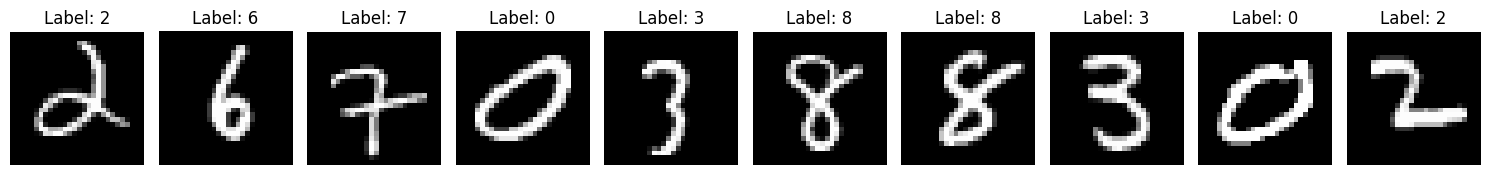

In [ ]:
# Visualize 5-10 random sample images
num_samples = 10
random_indices = np.random.choice(feature_train_full.shape[0], num_samples, replace=False)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(feature_train_full[idx], cmap='gray')
    plt.title(f"Label: {label_train_full[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## 1.1 Preprocessing
- Normalize pixel values to 0-1 range.
- Flatten images from 28x28 to 784 features.
- Split training data into training and validation sets (80/20) using stratified sampling.

In [ ]:
# Normalize pixel values
feature_train_full = feature_train_full.astype('float32') / 255.0
feature_test = feature_test.astype('float32') / 255.0

# Flatten the images
feature_train_flat = feature_train_full.reshape(feature_train_full.shape[0], -1)
feature_test_flat = feature_test.reshape(feature_test.shape[0], -1)

# Split into training and validation sets (80% train, 20% validation)
feature_train, feature_val, label_train, label_val = train_test_split(
    feature_train_flat, label_train_full,
    test_size=0.2,
    stratify=label_train_full,
    random_state=42
)

print(f"Feature Train Shape: {feature_train.shape}")
print(f"Feature Val Shape: {feature_val.shape}")
print(f"Feature Test Shape: {feature_test_flat.shape}")

Feature Train Shape: (48000, 784)
Feature Val Shape: (12000, 784)
Feature Test Shape: (10000, 784)


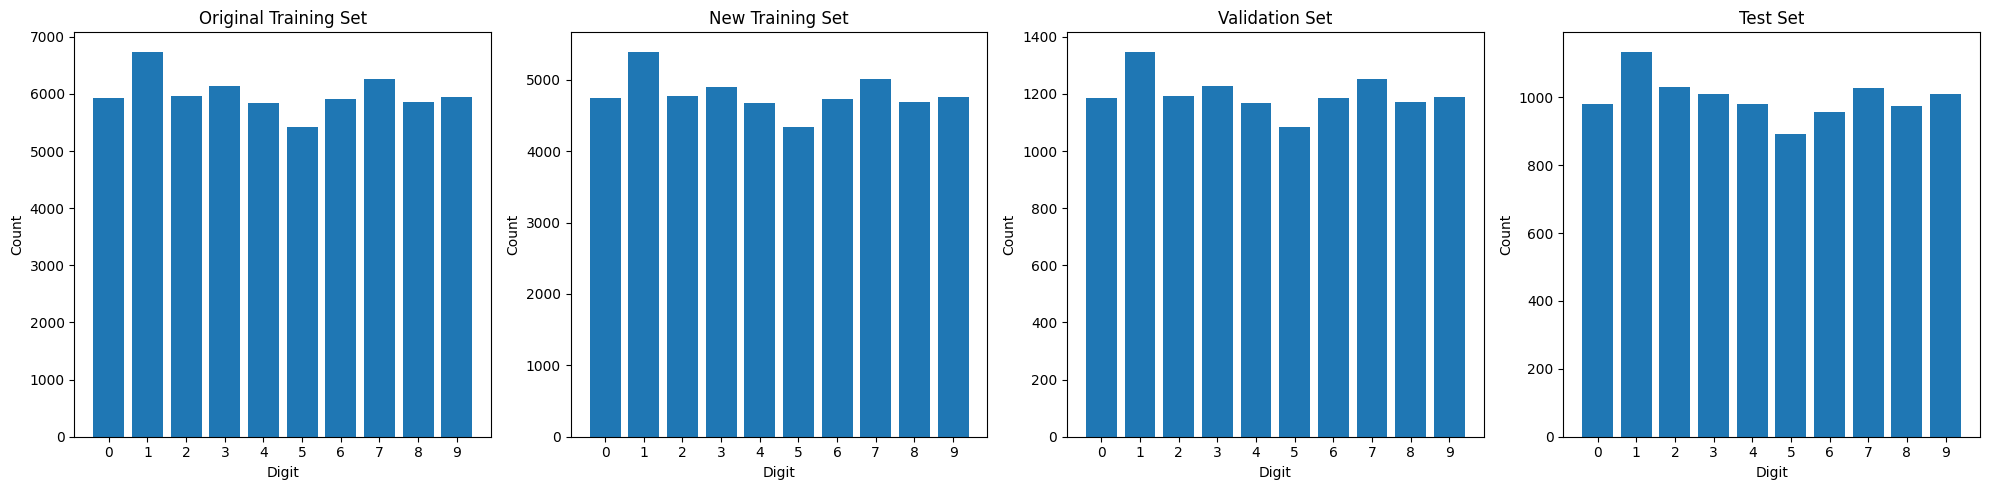

In [ ]:
# Visualize Class Distributions
def plot_distribution(labels, title):
    unique, counts = np.unique(labels, return_counts=True)
    plt.bar(unique, counts)
    plt.title(title)
    plt.xlabel('Digit')
    plt.ylabel('Count')
    plt.xticks(unique)

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plot_distribution(label_train_full, 'Original Training Set')

plt.subplot(1, 4, 2)
plot_distribution(label_train, 'New Training Set')

plt.subplot(1, 4, 3)
plot_distribution(label_val, 'Validation Set')

plt.subplot(1, 4, 4)
plot_distribution(label_test, 'Test Set')

plt.tight_layout()
plt.show()

## 2. Building the Decision Tree Classifier
We will train a decision tree using Information Gain (criterion='entropy').

In [ ]:
# Initialize and train Decision Tree Classifier
dt_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_clf.fit(feature_train, label_train)

# Evaluate on validation set
print(f"Validation Accuracy (Default DT): {dt_clf.score(feature_val, label_val):.4f}")

Validation Accuracy (Default DT): 0.8730


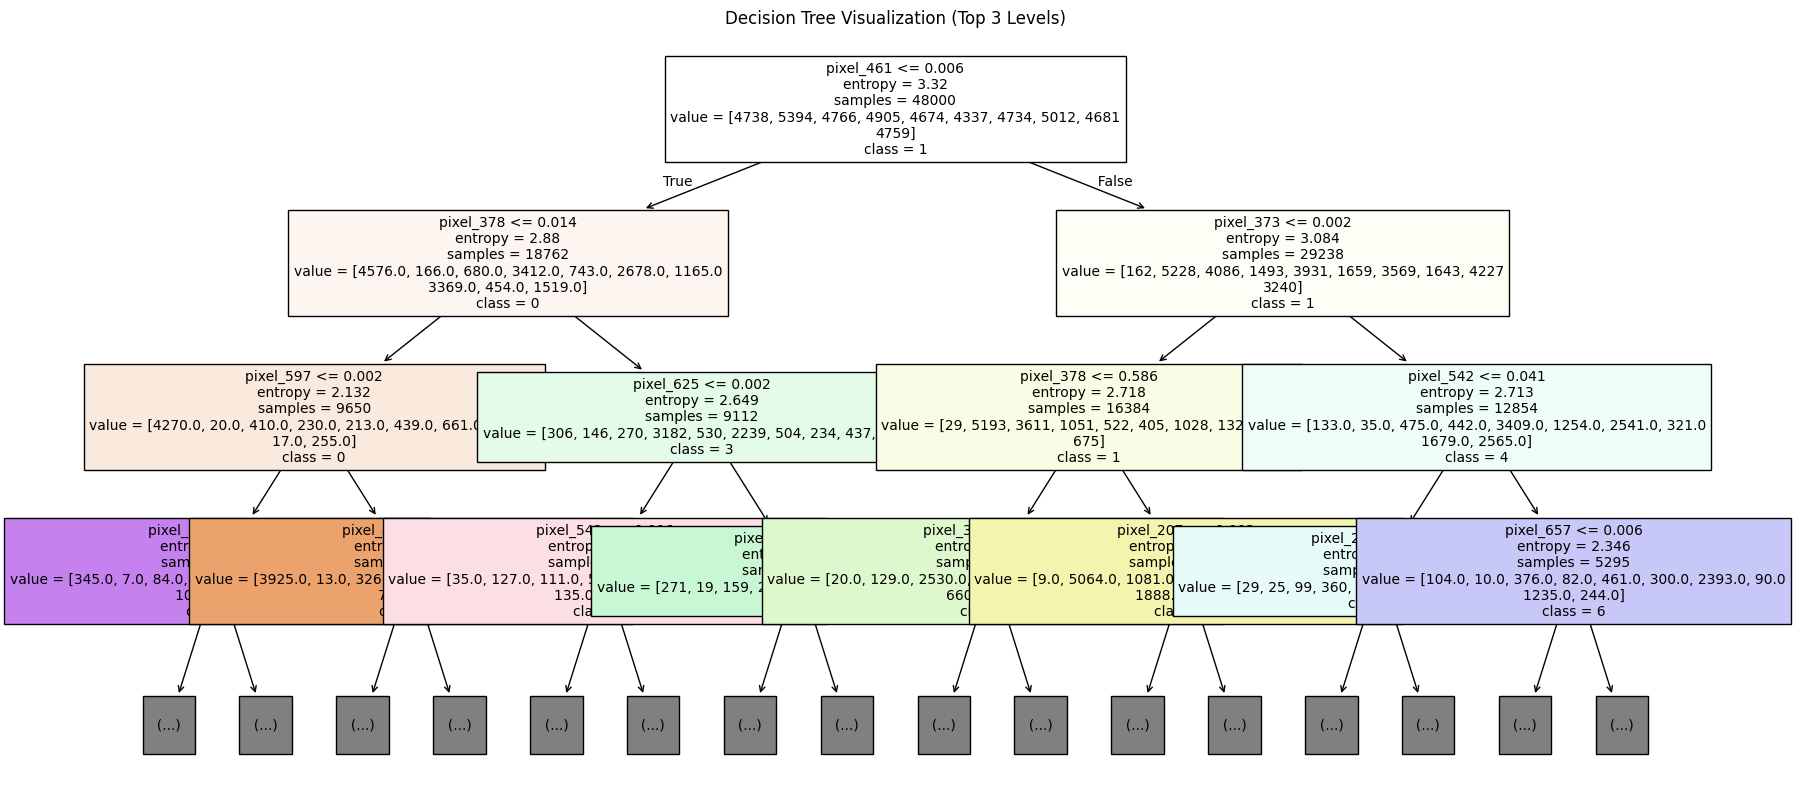

In [ ]:
# Visualize the decision tree (limited depth for readability)
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, max_depth=3, feature_names=[f"pixel_{i}" for i in range(784)], class_names=[str(i) for i in range(10)], filled=True, fontsize=10)
plt.title("Decision Tree Visualization (Top 3 Levels)")
plt.show()

## 3. Hyperparameter Tuning for Decision Tree
We will tune `max_depth`, `min_samples_split`, and `min_samples_leaf` using GridSearchCV.

In [ ]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=42), param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Train with Grid Search
grid_search.fit(feature_train, label_train)

# Best hyperparameters
best_dt_params = grid_search.best_params_
print("Best Hyperparameters:", best_dt_params)

# Best Model
best_dt_model = grid_search.best_estimator_
print(f"Best Validation Accuracy: {best_dt_model.score(feature_val, label_val):.4f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Validation Accuracy: 0.8722


Further tuning

In [ ]:
# Try out new hyperparameter grid
param_grid = {
    'max_depth': [15, 20, 25, 30, 35], # Explore deeper trees
    'min_samples_leaf': [1, 2, 4],           # Regularization to prevent overfitting at depth
    'min_samples_split': [2, 5]              # Minor adjustments to splitting logic
}

# Setup GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=42), param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Train with Grid Search
grid_search.fit(feature_train, label_train)

# Best hyperparameters
best_dt_params = grid_search.best_params_
print("Best Hyperparameters:", best_dt_params)

# Best Model
best_dt_model = grid_search.best_estimator_
print(f"Best Validation Accuracy: {best_dt_model.score(feature_val, label_val):.4f}")

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Validation Accuracy: 0.8722


## 4. Building the Neural Network Classifier
We will use `MLPClassifier` with 2 hidden layers (128, 64 neurons).

Iteration 1, loss = 0.43571631
Iteration 2, loss = 0.16846956
Iteration 3, loss = 0.12010069
Iteration 4, loss = 0.09119792
Iteration 5, loss = 0.07331639
Iteration 6, loss = 0.05955987
Iteration 7, loss = 0.04944489
Iteration 8, loss = 0.04021236
Iteration 9, loss = 0.03261197
Iteration 10, loss = 0.02756308
Iteration 11, loss = 0.02286001
Iteration 12, loss = 0.01961572
Iteration 13, loss = 0.01792028
Iteration 14, loss = 0.01455649
Iteration 15, loss = 0.01050427
Iteration 16, loss = 0.00998632
Iteration 17, loss = 0.00894301
Iteration 18, loss = 0.00600718
Iteration 19, loss = 0.00577172
Iteration 20, loss = 0.00609395
Iteration 21, loss = 0.00910653
Iteration 22, loss = 0.00838890
Iteration 23, loss = 0.00698680
Iteration 24, loss = 0.00736620
Iteration 25, loss = 0.00393071
Iteration 26, loss = 0.00528459
Iteration 27, loss = 0.00551230
Iteration 28, loss = 0.00557869
Iteration 29, loss = 0.00410604
Iteration 30, loss = 0.00183263
Iteration 31, loss = 0.00121321
Iteration 32, los

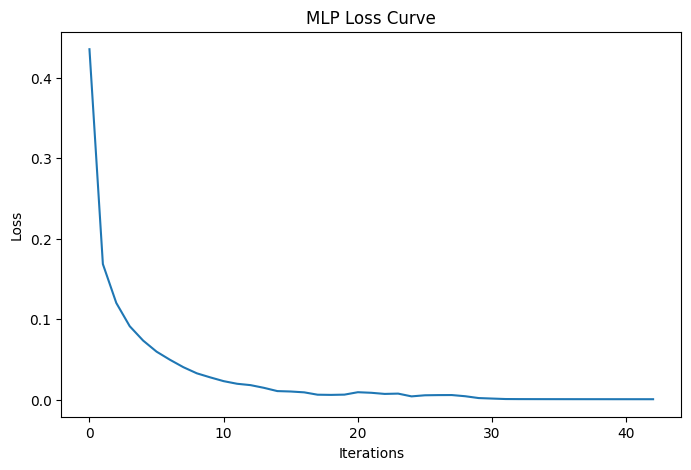

In [ ]:
# Initialize MLP Classifier
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    max_iter=50,
    random_state=42,
    verbose=True
)

# Train MLP
mlp_clf.fit(feature_train, label_train)

# Plot Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(mlp_clf.loss_curve_)
plt.title("MLP Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

## 5. Performance Evaluation & Comparison
Evaluating both the best Decision Tree and the Neural Network on the Test Set.


==================== Decision Tree ====================
Accuracy: 0.8787
Precision: 0.8786
Recall: 0.8787
F1 Score: 0.8786


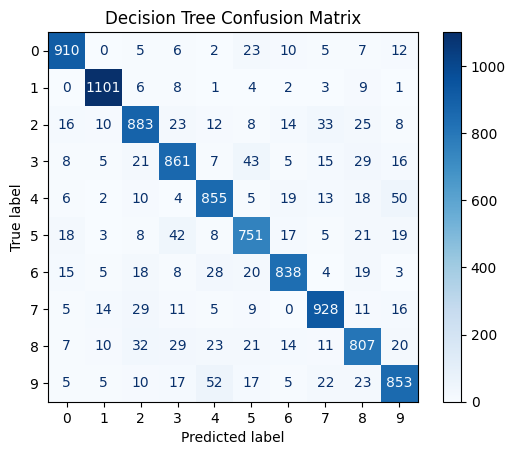

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       980
           1       0.95      0.97      0.96      1135
           2       0.86      0.86      0.86      1032
           3       0.85      0.85      0.85      1010
           4       0.86      0.87      0.87       982
           5       0.83      0.84      0.84       892
           6       0.91      0.87      0.89       958
           7       0.89      0.90      0.90      1028
           8       0.83      0.83      0.83       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


==================== Neural Network ====================
Accuracy: 0.9798
Precision: 0.9798
Recall: 0.9798
F1 Score: 0.9798


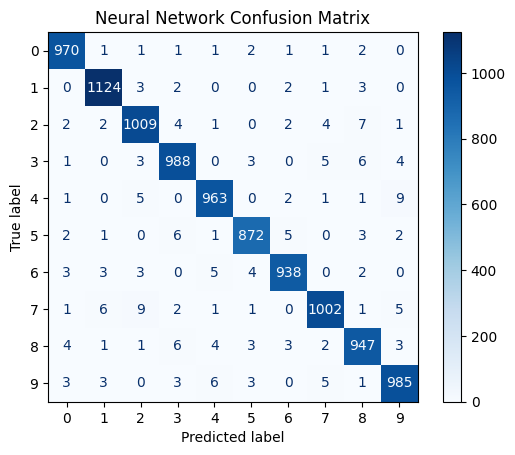

Classification Report for Neural Network:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
models = {"Decision Tree": best_dt_model, "Neural Network": mlp_clf}

for name, model in models.items():
    print(f"\n{'='*20} {name} {'='*20}")
    y_pred = model.predict(feature_test_flat)

    # Metrics
    acc = accuracy_score(label_test, y_pred)
    prec = precision_score(label_test, y_pred, average='weighted')
    rec = recall_score(label_test, y_pred, average='weighted')
    f1 = f1_score(label_test, y_pred, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(label_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
    disp.plot(cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    # Classification Report
    print(f"Classification Report for {name}:\n")
    print(classification_report(label_test, y_pred))

## Conclusion & Insights


- **Which model performed better?**
    - Typically, the Neural Network (MLP) outperforms the Decision Tree on image data like MNIST. Decision Trees struggle with pixel-level dependencies and translation invariance, whereas MLPs (even simple ones) can capture non-linear relationships better.

- **Did the Decision Tree overfit?**
    - Decision Trees tend to overfit if not pruned (max_depth restricted). The difference between training accuracy and validation accuracy would indicate overfitting. Tuning the hyperparameters helps mitigate this.

- **Which digits were most commonly confused?**
    - Common confusions in MNIST include 4 vs 9, 3 vs 5, or 8 vs 3. The Confusion Matrix above highlights the specific misclassifications for this run.